In [1]:
from skimage.draw import polygon
import PIL
import json
import base64
import os.path
from os.path import splitext
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import re
from random import *

In [2]:
classes = {"Strasse" : 1, 
           "strasse" : 1,
          "Streifen" : 2,
           "streifen" : 2,
          "Auto" : 3, 
          "auto" : 3,
          "Schild" : 4,
           "schild" : 4,
         }

colors = {0 : (0,0,0), 
          1 : (0,0,255), 
          2 : (0,255,0),
          3 : (255,0,0), 
          4 : (0,255,255),         
         }

dim = (256, 256) 

path =  r'D:\dev\dcps\AutonomesFahren\data'
dirjson = "jsons"
dirimages = "images"
dirmasks = "masks"
dirimagesaugmented = "images_augmented"
dirmasksaugmented = "masks_augmented"

dirjsonsvalid = "jsons_valid"
dirimagesvalid = "images_valid"
dirmasksvalid = "masks_valid"

dirjsonstest = "jsons_test"
dirimagestest = "images_test"
dirmaskstest = "masks_test"

fullpathjson = os.path.join(path, dirjson)
fullpathimages = os.path.join(path, dirimages)
fullpathmasks = os.path.join(path, dirmasks)

fullpathimagesaugmented = os.path.join(path, dirimagesaugmented)
fullpathmasksaugmented = os.path.join(path, dirmasksaugmented)

fullpathjsonsvalid = os.path.join(path, dirjsonsvalid)
fullpathimagesvalid = os.path.join(path, dirimagesvalid)
fullpathmasksvalid = os.path.join(path, dirmasksvalid)

fullpathjsonstest = os.path.join(path, dirjsonstest)
fullpathimagestest = os.path.join(path, dirimagestest)
fullpathmaskstest = os.path.join(path, dirmaskstest)

print(os.path.exists(fullpathjson))
print(os.path.exists(fullpathimages))
print(os.path.exists(fullpathmasks))
print(os.path.exists(fullpathmasksvalid))


True
True
True
True


In [49]:
def makesquare2(img):
    
    assert(img.ndim == 2) 
    
    edge = min(img.shape[0],img.shape[1])
        
    img_sq = np.zeros((edge, edge), 'uint8')
    
    if(edge == img.shape[0]):
        img_sq[:,:] = img[:,int((img.shape[1] - edge)/2):int((img.shape[1] - edge)/2)+edge]
    else:
        img_sq[:,:,:] = img[int((img.shape[0] - edge)/2):int((img.shape[0] - edge)/2)+edge,:]

    assert(img_sq.shape[0] == edge and img_sq.shape[1] == edge)
    
    return img_sq

In [50]:
def makesquare3(img):
    
    assert(img.ndim == 3)
    
    edge = min(img.shape[0],img.shape[1])
        
    img_sq = np.zeros((edge, edge, 3), 'uint8')
    
    if(edge == img.shape[0]):
        img_sq[:,:,:] = img[:,int((img.shape[1] - edge)/2):int((img.shape[1] - edge)/2)+edge,:]
    else:
        img_sq[:,:,:] = img[int((img.shape[0] - edge)/2):int((img.shape[0] - edge)/2)+edge,:,:]

    assert(img_sq.shape[0] == edge and img_sq.shape[1] == edge)
    
    return img_sq

In [51]:
def testMasks(sourcejsonsdir, destimagesdir, destmasksdir):
    count = 0
    directory = sourcejsonsdir
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            print("{}:{}".format(count,os.path.join(directory, filename)))
            f = open(os.path.join(directory, filename))
            data = json.load(f)
            #print(data['imagePath'])
            img_arr = data['imageData']  
            imgdata = base64.b64decode(img_arr)

            img = cv2.imdecode(np.frombuffer(imgdata, dtype=np.uint8), flags=cv2.IMREAD_COLOR)

            #print(img.shape[0])
            #print(img.shape[1])
            
            assert (img.shape[0] > dim[0])
            assert (img.shape[1] > dim[1])
           
            img = makesquare3(img)

            #assert(img.shape[0] == img.shape[1])
          
            for shape in data['shapes']:
                if not (shape['label'] in classes):
                    f.close()
                    assert(0 > 1)
                
            count += 1
            
            f.close()

In [52]:
testMasks(fullpathjson, fullpathimages, fullpathmasks)
testMasks(fullpathjsonsvalid, fullpathimagesvalid, fullpathmasksvalid)
testMasks(fullpathjsonstest, fullpathimagestest, fullpathmaskstest)

0:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0155.json
1:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0001.json
2:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0198.json
3:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0111.json
4:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0152.json
5:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0191.json
6:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0088.json
7:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0172.json
8:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0102.json
9:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0022.json
10:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0040.json
11:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0137.json
12:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0202.json
13:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0158.json
14:/home/moamen/myGitRepos/AutonomesFahren/d

124:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0163.json
125:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0186.json
126:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0179.json
127:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0226.json
128:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0042.json
129:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0165.json
130:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0048.json
131:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0132.json
132:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0076.json
133:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0006.json
134:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0079.json
135:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0101.json
136:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0153.json
137:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0220.json
138:/home/moamen/myG

In [53]:
def createMasks(sourcejsonsdir, destimagesdir, destmasksdir):

    assocf = open(os.path.join(path,"assoc_orig.txt"), "w")
    #assocfile = open("assoc_orig.txt", "w")
    #print(os.path.join(path,"assoc_orig.txt"))
    #print(os.path.exists(os.path.join(path,"assoc_orig.txt")))
    #print(f.writable())
    #f.write("")
    count = 0
    directory = sourcejsonsdir
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            print("{}:{}".format(count,os.path.join(directory, filename)))
            
            f = open(os.path.join(directory, filename))
            data = json.load(f)
            #print(data['imagePath'])
            img_arr = data['imageData']  
            imgdata = base64.b64decode(img_arr)

            img = cv2.imdecode(np.frombuffer(imgdata, dtype=np.uint8), flags=cv2.IMREAD_COLOR)
            
            assert (img.shape[0] > dim[0])
            assert (img.shape[1] > dim[1])
           
            finalmask = np.zeros((img.shape[0], img.shape[1]), 'uint8')
            #finalmask_strasse = np.zeros((img.shape[0], img.shape[1]), 'uint8')
        
            masks=[]
            masks_strassen=[]
            mask_strasse = np.zeros((img.shape[0], img.shape[1]), 'uint8')
            
            
            for shape in data['shapes']:
                assert(shape['label'] in classes)

                vertices = np.array([[point[1],point[0]] for point in shape['points']])
                vertices = vertices.astype(int)

                rr, cc = polygon(vertices[:,0], vertices[:,1], img.shape)
                mask_orig = np.zeros((img.shape[0], img.shape[1]), 'uint8')

                mask_orig[rr,cc] = classes[shape['label']]
                if classes[shape['label']] != classes['Strasse']:
                    masks.append(mask_orig)
                else:
                    masks_strassen.append(mask_orig)
                    
            for m in masks_strassen:
                mask_strasse += m
                    
            for m in masks:
                _,mthresh = cv2.threshold(m,0,255,cv2.THRESH_BINARY_INV)
                finalmask = cv2.bitwise_and(finalmask,finalmask,mask = mthresh)
                finalmask += m

            _,mthresh = cv2.threshold(finalmask,0,255,cv2.THRESH_BINARY_INV)
            mask_strasse = cv2.bitwise_and(mask_strasse,mask_strasse, mask = mthresh)
            finalmask += mask_strasse  
                
            img = makesquare3(img)
            finalmask = makesquare2(finalmask)

            img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)
            finalmask_resized = cv2.resize(finalmask, dim, interpolation = cv2.INTER_NEAREST)
            
            filepure,extension = splitext(filename)
            
            cv2.imwrite(os.path.join(destimagesdir, "{}o.png".format(filepure)), img_resized)
            cv2.imwrite(os.path.join(destmasksdir, "{}o.png".format(filepure)), finalmask_resized)

            assocf.write("{:05d}o:{}\n".format(count,filename))
            assocf.flush()
            count += 1

        else:
            continue
    f.close()

In [84]:
def createMasksAugmented(ident, sourcejsonsdir, destimagesdir, destmasksdir):

    assocf = open(os.path.join(path,"assoc_{}_augmented.txt".format(ident)), "w")

    count = 0
    directory = sourcejsonsdir
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            print("{}:{}".format(count,os.path.join(directory, filename)))
            #print(os.path.join(directory, filename))

            f = open(os.path.join(directory, filename))
            data = json.load(f)
            #print(data['imagePath'])
            img_arr = data['imageData']  
            imgdata = base64.b64decode(img_arr)

            img = cv2.imdecode(np.frombuffer(imgdata, dtype=np.uint8), flags=cv2.IMREAD_COLOR)
            
            assert (img.shape[0] > dim[0])
            assert (img.shape[1] > dim[1])
            
            zoom = randint(75,90)/100.0
            angle = (2*random()-1)*3.0
            img_rotated = imutils.rotate_bound(img, angle)
            
            xf = int(img_rotated.shape[0]*zoom)
            yf = int(img_rotated.shape[1]*zoom)            
            
            img_zoomed = np.zeros((xf, yf, img_rotated.shape[2]), 'uint8')
            img_zoomed[:,:,:] = img_rotated[int((img_rotated.shape[0]-xf)/2):int((img_rotated.shape[0]-xf)/2)+xf,int((img_rotated.shape[1]-yf)/2):int((img_rotated.shape[1]-yf)/2)+yf,:] 
        

            finalmask = np.zeros((img_zoomed.shape[0], img_zoomed.shape[1]), 'uint8')
            mthresh = np.zeros((img_zoomed.shape[0], img_zoomed.shape[1]), 'uint8')
            masks=[]
            masks_strassen=[]
            mask_strasse = np.zeros((img_zoomed.shape[0], img_zoomed.shape[1]), 'uint8')

            for shape in data['shapes']:
                assert(shape['label'] in classes)

                vertices = np.array([[point[1],point[0]] for point in shape['points']])
                vertices = vertices.astype(int)

                rr, cc = polygon(vertices[:,0], vertices[:,1], img.shape)
                mask_orig = np.zeros((img.shape[0], img.shape[1]), 'uint8')
                mask_orig[rr,cc] = classes[shape['label']]
                
                mask_rotated = imutils.rotate_bound(mask_orig, angle)
                
                mask_zoomed = np.zeros((xf, yf), 'uint8')
                mask_zoomed[:,:] = mask_rotated[int((img_rotated.shape[0]-xf)/2):int((img_rotated.shape[0]-xf)/2)+xf,int((img_rotated.shape[1]-yf)/2):int((img_rotated.shape[1]-yf)/2)+yf] 
                
                if classes[shape['label']] != classes['Strasse']:
                    masks.append(mask_zoomed)
                else:
                    masks_strassen.append(mask_zoomed)

            for m in masks_strassen:
                mask_strasse += m
                    
            for m in masks:
                _,mthresh = cv2.threshold(m,1,255,cv2.THRESH_BINARY_INV)
                finalmask = cv2.bitwise_and(finalmask,finalmask,mask = mthresh)
                finalmask += m

            _,mthresh = cv2.threshold(finalmask,1,255,cv2.THRESH_BINARY_INV)
            mask_strasse = cv2.bitwise_and(mask_strasse,mask_strasse, mask = mthresh)
            finalmask += mask_strasse    
    
            # contrast-> alpha: 1.0 - 3.0; brightness -> beta: 0 - 100
            alpha = 0.8 + 0.4*random();
            beta = int(random()*15)
    
            img_adjusted = cv2.convertScaleAbs(img_zoomed, alpha=alpha, beta=beta)
        
        
            img_adjusted = makesquare3(img_adjusted)
            finalmask = makesquare2(finalmask)

            img_resized = cv2.resize(img_adjusted, dim, interpolation = cv2.INTER_NEAREST)
            finalmask_resized = cv2.resize(finalmask, dim, interpolation = cv2.INTER_NEAREST)
            
            filepure,extension = splitext(filename)
            
            cv2.imwrite(os.path.join(destimagesdir, "{}{}.png".format(filepure, ident)), img_resized)
            cv2.imwrite(os.path.join(destmasksdir, "{}{}.png".format(filepure, ident)), finalmask_resized) 

            assocf.write("{:05d}:{}\n".format(count, filename))
            assocf.flush()
            count += 1

        else:
            continue
    f.close()


In [54]:
createMasks(fullpathjson, fullpathimages, fullpathmasks)
#createMasksAugmented("a1",fullpathjson, fullpathimages, fullpathmasks)
#createMasksAugmented("a2",fullpathjson, fullpathimages, fullpathmasks)
#createMasksAugmented("a3",fullpathjson, fullpathimages, fullpathmasks)

0:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0155.json
1:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0001.json
2:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0198.json
3:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0111.json
4:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0152.json
5:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0191.json
6:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0088.json
7:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0172.json
8:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0102.json
9:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0022.json
10:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0040.json
11:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0137.json
12:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0202.json
13:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0158.json
14:/home/moamen/myGitRepos/AutonomesFahren/d

119:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0003.json
120:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0113.json
121:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0173.json
122:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0232.json
123:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0174.json
124:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0163.json
125:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0186.json
126:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0179.json
127:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0226.json
128:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0042.json
129:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0165.json
130:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0048.json
131:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0132.json
132:/home/moamen/myGitRepos/AutonomesFahren/data/jsons/image0076.json
133:/home/moamen/myG

In [ ]:
# start 08.29 voraussichlich ende: 12.29 haelfte

In [55]:
createMasks(fullpathjsonsvalid, fullpathimagesvalid, fullpathmasksvalid)
#createMasksAugmented("a4", fullpathjsonsvalid, fullpathimagesvalid, fullpathmasksvalid)

0:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0021.json
1:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0136.json
2:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0139.json
3:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0082.json
4:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0027.json
5:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0133.json
6:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0070.json
7:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0148.json
8:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0015.json
9:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0071.json
10:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0142.json
11:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0018.json
12:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_valid/image0057.json
13:/home/moamen/myGitRepos/Autonome

In [56]:
def makemask(mask):
    assert(dim[0] == mask.shape[0])
    assert(dim[1] == mask.shape[1])
    ret_mask = np.zeros((dim[0], dim[1], 3), 'uint8')
    for i in range(dim[0]):
        for j in range(dim[1]):
                assert(mask[i,j] < len(colors))
                ret_mask[i,j,0] = colors[mask[i,j]][0]
                ret_mask[i,j,1] = colors[mask[i,j]][1]
                ret_mask[i,j,2] = colors[mask[i,j]][2]
    return ret_mask

In [57]:
createMasks(fullpathjsonstest, fullpathimagestest, fullpathmaskstest)

0:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_test/image0216.json
1:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_test/image0118.json
2:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_test/image0096.json
3:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_test/image0156.json
4:/home/moamen/myGitRepos/AutonomesFahren/data/jsons_test/image0077.json


In [58]:
print(dim)

(512, 512)


In [59]:
imagetestlist = []

imagetestnames = os.listdir(fullpathimagestest)
imagetestnames.sort()

masktestlist = []

masktestnames = os.listdir(fullpathmaskstest)
masktestnames.sort()

for imagename in imagetestnames:
    if imagename.endswith(".png"):
        imagetestlist.append(cv2.imread(os.path.join(fullpathimagestest,imagename),cv2.IMREAD_COLOR ))

for maskname in masktestnames:
    if maskname.endswith(".png"):
        masktestlist.append(makemask(cv2.imread(os.path.join(fullpathmaskstest,maskname),cv2.IMREAD_UNCHANGED )))
     

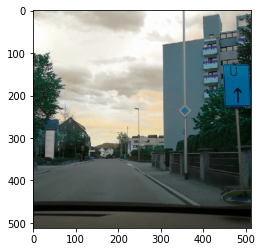

In [60]:
j = 2
plt.imshow(imagetestlist[j])

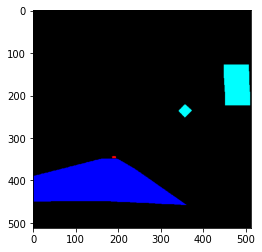

In [61]:
plt.imshow(masktestlist[j])

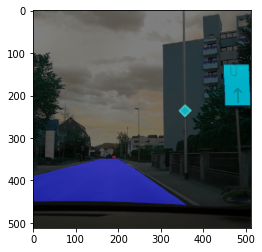

In [62]:
weighted = np.zeros((dim[0], dim[1], 3), 'uint8')
cv2.addWeighted(imagetestlist[j], 0.5, masktestlist[j], 0.5, 0, weighted)
plt.imshow(weighted)

In [63]:
assert(len(imagetestlist) == len(masktestlist))

for i in range(len(imagetestlist)):
    weighted = np.zeros((dim[0], dim[1], 3), 'uint8')
    cv2.addWeighted(imagetestlist[i], 0.5, masktestlist[i], 0.5, 0, weighted)
    #plt.imshow(weighted)
    cv2.imwrite(os.path.join(path,"comparison","image{}-orig.png".format(i)),weighted)

In [3]:
def checkimages(fullpathimages, fullpathmasks):
    imagenames = []
    masknames = []
    imagenames = os.listdir(fullpathimages)
    imagenames.sort()

    masknames = os.listdir(fullpathmasks)
    masknames.sort()

    assert (len(imagenames) == len(masknames))

    for j in range(len(imagenames)):
        assert(imagenames[j] == masknames[j])

    for j in range(len(imagenames)):
        print(imagenames[j])
        
        origname =os.path.join(fullpathimages,imagenames[j])
        maskname = os.path.join(fullpathmasks, masknames[j])
        weighted = np.zeros((dim[0], dim[1], 3), 'uint8')
        origimg = cv2.imread(origname,cv2.IMREAD_COLOR )
        maskimg =cv2.imread(maskname,cv2.IMREAD_UNCHANGED )
        

        if origimg.shape[0] != dim[0] or origimg.shape[1] != dim[1]:
            print("fail opening orig with {}".format(origname))
            continue
        if maskimg.shape[0] != dim[0] or maskimg.shape[1] != dim[1]:
            print("fail opening mask with {}".format(maskname))
            continue           

        cv2.addWeighted(origimg, 0.5, makemask(maskimg), 0.5, 0, weighted)
        cv2.imwrite(os.path.join(path,"comparison", imagenames[j]),weighted)
    

In [4]:
print(fullpathimages)
print(fullpathmasks)
checkimages(fullpathimagesaugmented, fullpathmasksaugmented)
checkimages(fullpathimagesvalid, fullpathmasksvalid)
checkimages(fullpathimagestest, fullpathmaskstest)

D:\dev\dcps\AutonomesFahren\data\images
D:\dev\dcps\AutonomesFahren\data\masks


AssertionError: 